In [1]:
import cv2
#from cv2 import face
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

#### Function To Convert Images to RGB Pattern

In [2]:
def convertToRGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#### Loading the Image

In [3]:
test1 = cv2.imread('D:/Capstone project/Capstone_DL_Kranthi/data/test1.jpg')

In [4]:
gray_img = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)

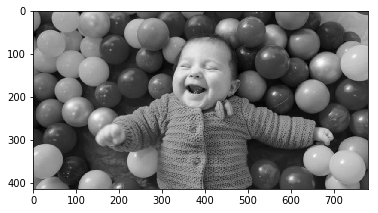

In [5]:
plt.imshow(gray_img, cmap = 'gray')

In [6]:
haar_face_cascade = cv2.CascadeClassifier('D:/Capstone project/Capstone_DL_Kranthi/data/haarcascades/haarcascade_frontalface_alt.xml')

In [7]:
faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor = 1.1, minNeighbors = 5)

In [8]:
print('Faces Found: ', len(faces))

Faces Found:  1


In [9]:
for (x, y, w, h) in faces:
    cv2.rectangle(test1, (x, y), (x+w, y+h), (0, 255, 0), 2)

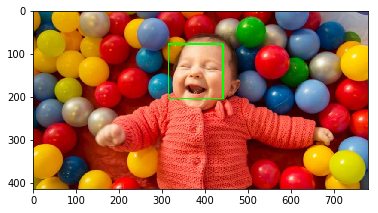

In [10]:
plt.imshow(convertToRGB(test1))

In [11]:
#giving the subject for Face recognisition 
subject = ["", "Federer"]

#### Preparing the Data for face Recognition

In [12]:
def detect_face(img):
    
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    face_cascade = cv2.CascadeClassifier('D:/Capstone project/Capstone_DL_Kranthi/data/haarcascades/lbpcascade_frontalface.xml')
    faces = face_cascade.detectMultiScale(gray, scaleFactor = 1.2, minNeighbors = 5)
    
    if len(faces) == 0:
        return None, None
    
    (x, y, w, h) = faces[0]
    
    return gray[y: y+w, x: x+h], faces[0]

In [13]:
def prepare_training_data(data_folder_path):
    
    dirs = os.listdir(data_folder_path)
    print(dirs)
    faces = []
    labels = []
    for dir_name in dirs:
        if not dir_name.startswith('s'):
            continue
        label = int(dir_name.replace('s', ''))
        print(label)
        subject_dir_path = data_folder_path + '/' + dir_name
        print(subject_dir_path)
        subject_images_name = os.listdir(subject_dir_path)

        for image_name in subject_images_name:

            if image_name.startswith("."):
                continue

            image_path = subject_dir_path + '/' + image_name
            image = cv2.imread(image_path)
            #print(image)
    #         cv2.imshow('Training on Image... ', image)
    #         cv2.waitKey(1000)

            face, rect = detect_face(image)

            if face is not None:

                faces.append(face)
                labels.append(label)
                #print(faces)
                #print(labels)
    #         cv2.destroyAllWindows()
    #         cv2.waitKey(1)
    #         cv2.destroyAllWindows()

    return faces, labels

In [14]:
faces, labels = prepare_training_data("D:/Capstone project/Capstone_DL_Kranthi/train")
print('Total Faces: ', len(faces))
print('Total Labels: ', len(labels))

['s1', 's2']
1
D:/Capstone project/Capstone_DL_Kranthi/train/s1
2
D:/Capstone project/Capstone_DL_Kranthi/train/s2
Total Faces:  4
Total Labels:  4


#### Creating Face Recognizer

In [15]:
face_recognizer = cv2.face.LBPHFaceRecognizer_create()

 

In [16]:
face_recognizer.train(faces, np.array(labels))

#### Creating Rectangles on Image

In [17]:
def draw_rectangle(img, rect):
    (x, y, w, h) = rect
    cv2.rectangle(img, (x, y), (x+h, y+w), (0, 255, 0), 2)

#### Writing text on Image

In [18]:
def draw_text(img, text, x, y):
    cv2.putText(img, text, (x, y), cv2.FONT_HERSHEY_PLAIN, 1.5, (0, 255, 0), 2)

#### Predicting The Image

In [19]:
def predict(test_img):
    
    img = test_img.copy()
    face, rect = detect_face(img)
    label = face_recognizer.predict(face)
    #print(label)
    label_text = subject[label[0]]
    draw_rectangle(img, rect)
    draw_text(img, label_text, rect[0], rect[1]-5)
    return img

In [20]:

test_img1 = cv2.imread('D:/Capstone project/Capstone_DL_Kranthi/test/federer_test.jpg')

In [22]:
predict_img1 = predict(test_img1)

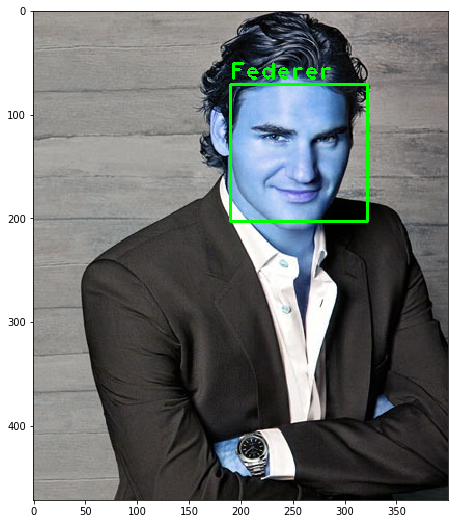

In [23]:
plt.figure(figsize = (10, 9))
plt.imshow(predict_img1)
plt.show()